# Language Classification using the Trigram Features


## Contents
1. [Introduction](#1.-Introduction)
2. [Reading Data](#2.-Reading-Data)
3. [Analyzing and Preparing the Data](#3.-Analyzing-and-Preparing-the-Data)
4. [Preprocessing](#4.-Preprocessing)
5. [Feature Engineering](#5.-Feature-Engineering)
6. [Modeling](#6.-Modeling)
7. [Evaluation](#7.-Evaluation)
8. [Inference](#8.-Inference)
9. [References](#9.-References)


## 1. Introduction
Language identification is the 1st step that should be done before modeling the text or even preprocessing. Today, there is much online avialable social-media data in all languages. The same post or tweet has a mix of two or more languages. So, you can see German, and English in the same tweet. So, before the preprocessing step, the language should be identified to define suitable tools for each language in the preprocessing.

To be able to do the language classification task, I used the data avialable from this [link](https://downloads.tatoeba.org/exports/sentences.csv), This CSV data file contains many languages text.

I excecuted the language classification task only on 6 latin languages. So, I extracted text data in the following languages:
<li>English</li>
<li>German</li>
<li>Frensh</li>
<li>Italian</li>
<li>Spanish</li>
<li>Portugees</li>

In Reading Data section, you will find the code responsible for reading the dataset.

In Analyzing and Preparing the Data section, I started to analyze the dataset to know more information about the dataset. This will help to work on this dataset. Then, I prepared the dataset by cleaning it from nan values to have a consistent dataset. And then, I extracted the required texts on the above list of languages. Finally, I divided it into training, validation, and testing. 

In preprocessing section, I normalized the text by lowering it, and normalizing spaces. Also, I removed punctuation and digits from the data. The digits are the same in all latin languages.


In Feature extracting part, I strated to extract the following features:
- 3-gram.
- 4-gram.
- 5-gram.

I extracted the most common 400 features 3-5 grams for each language. Then, I combined all of the features together and removed the commo features between languages. so that we have 1564 feature from all languages instead of having 400*6=2400

In modeling part, I started to build the model using the nueral network fully connected layers. I used a keras as a framework to build the model. The model consists of input layer, 5 fully conected layers with relu activation layer, and finally the ouput layer with 6 diffrent outputs and softmax activation layer to choose the highest lable probability.



![Model Architecture](img/image.png)



Also, in modeling part, I tunned the hyperparamters as follows:
<li>Hidden units numbers</li>
<li>Epochs number</li>
<li>Activation function</li>
<li>Batch size</li>


In evaluation part, I used the model output from modeling part on testing data mainly. I used both confusion matrix and the accuracy metrics to evaluate the model. The model achieved more than 0.99.

In inference part, I used the model to predict the input sentences. For me, I tried it. You can try it too! :)

Finally, I'd like to confirm, this language classification model done on only 6 latin languages. If you you would like to apply it on other languages. My suggested approach, is to do a model for the languages Common in alphabets together. To illustrate more, there should be a model for defrentiating the chinees, japanes, and korean. Also, there should be another model to defrentiate between Arabic and urdo. Also, there should be model to defrentiate between latin langaues like English, German,...ect. Of course, each model has its own preprocessing tools. So, the Arabic letters model has diffrent tool from latin letters model. 

In case of inference step, to define the model which will be used in the prediction, there should be a condition detecting the type of characters used in the input sentences if they are latin, arabic, or chinees characters. This step will help to deifne which model will be used in the prediction.

## 2. Reading Data

In [1]:
#Pandas is used to show the csv data
import pandas as pd

In [151]:
# Reading CSV
df = pd.read_csv('data/sentences.csv', sep='\t', encoding='utf8', index_col=0 ,names = ['Language', 'sentence'] )

In [3]:
# Showing the head of the dataframe
df.head()

,Language,sentence
1,cmn,我們試試看！
2,cmn,我该去睡觉了。
3,cmn,你在干什麼啊？
4,cmn,這是什麼啊？
5,cmn,今天是６月１８号，也是Muiriel的生日！


## 3. Analyzing and Preparing the Data

As we see here we have 406 language, But I will select only 6 languages from this dataframe. Also, I will consider sentetnces between 8 to 200 characters.

In [118]:
#To shows information about the dataset columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10375202 entries, 1 to 10827772
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Language  object
 1   sentence  object
dtypes: object(2)
memory usage: 237.5+ MB


In [4]:
#Showing the number of languages we have inside the dataset.
len(df.Language.unique())

406

Cleaning data from NaN values to have consistent data

In [5]:
df.dropna(subset =['Language', 'sentence'], inplace=True)

Defining the 6 languages which I will use in this task.

In [6]:
lang_ls = ['eng', 'deu', 'fra', 'ita', 'spa', 'por']

In [7]:
#Extracting all sentences in the above lang_ls
class_df = df[df.Language.isin(lang_ls)]

In [8]:
#Reset the index column
class_df.reset_index(drop=True, inplace=True)

In [9]:
class_df.shape

(4256775, 2)

Now, we have 4256775 sentence inside the dataset. Next, I will select senetences length between 8 and 200 characters

In [10]:
# consedring only sentetnce between 8 and 200
len_cond = [True if 8<=len(s)<=200 else False for s in class_df['sentence']]

In [11]:
class_df = class_df[len_cond]

In [12]:
class_df.shape

(1521698, 2)

Now we have only 1521698 sentences, Now, lets obtain the sentences count for each language

In [13]:
class_df.value_counts(class_df.Language=='eng')

Language
False    947031
True     574667
dtype: int64

In [14]:
class_df.value_counts(class_df.Language=='fra')

Language
False    1327265
True      194433
dtype: int64

In [15]:
class_df.value_counts(class_df.Language=='deu')

Language
False    1235682
True      286016
dtype: int64

In [16]:
class_df.value_counts(class_df.Language=='ita')

Language
False    1319261
True      202437
dtype: int64

In [17]:
class_df.value_counts(class_df.Language=='spa')

Language
False    1386775
True      134923
dtype: int64

In [18]:
class_df.value_counts(class_df.Language=='por')

Language
False    1392476
True      129222
dtype: int64

So, we have 574667 English sentences, 194433 french sentences, 286016 german sentences, 202437 Italian sentences, 134923 Spanish sentences, and  134923 Portuguese sentences.

Now I will select 30000 sentences from each language randomly. To do so, I will use the sample(). This method will help to create sample space randomly from the given data in a specific number of elements.  Here I chose 50000 rows of each language to be sampled from each language.

In [19]:
selected_df = pd.DataFrame()
for l in lang_ls:
    selected_sent = class_df[class_df['Language'] == l].sample(50000,random_state = 100)
    selected_df = selected_df.append(selected_sent)

In [20]:
# reset indcies from 0, to max
selected_df.reset_index(drop=True, inplace=True)

In [21]:
selected_df

,Language,sentence
0,eng,Tom and Mary both began wearing glasses when t...
1,eng,Tom and Mary should tell John they won't do that.
2,eng,I thought you said that the meeting was next M...
3,eng,"If you don't act like a good boy, you won't ge..."
4,eng,Tom and Mary told me you agreed with them.
...,...,...
299995,por,O futuro e o passado são indistinguíveis.
299996,por,Pensarei em você todos os dias em que estiver ...
299997,por,Guarda-chuvas são bem úteis quando está chovendo.
299998,por,"Nós deveríamos, também, esperar até que o Tom ..."


Now we have our dataset consisting of 300000 sentences of 6 langauges.

Next, I will divide it into training, validation, and testing data randomly. Selecting the data randomly will decrease the overfitting.

In [22]:
data_shuffle = selected_df.sample(frac=1, random_state=1)

In [23]:
train = data_shuffle[0:240000]
validation = data_shuffle[240000:270000]
test = data_shuffle[270000:300000]

In [24]:
train[train.Language == 'deu'].shape

(40069, 2)

In [25]:
train[train.Language == 'eng'].shape

(40105, 2)

In [26]:
train[train.Language == 'fra'].shape

(40001, 2)

In [27]:
train[train.Language == 'ita'].shape

(39912, 2)

In [28]:
train[train.Language == 'spa'].shape

(39899, 2)

In [29]:
train[train.Language == 'por'].shape

(40014, 2)

Now, We have training, validation, and testing data. Let's go to the next Step, Pre-processing.

## 4. Preprocessing

Here, I will clean the training, validation, and testing from punctuations and digits. Inaddition to the space normalization, and lowering.

In [125]:
from string import digits
import string

def pro_process(target_ls):
    data_list = []
    
    # Lowering all the texts
    data_list = target_ls.apply(lambda x: x.lower())
    
    # Removing the texts punctuations
    exclude = set(string.punctuation)
    data_list = data_list.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
    
    # Removing distances
    data_list = data_list.apply(lambda x: " ".join(x.split())) 
    
    # Removing the digits from the texts
    remove_digits = str.maketrans('', '', digits)
    data_list = data_list.apply(lambda x: x.translate(remove_digits)) 

 
    return data_list
    
train['sentence'] = pro_process(train.sentence)
validation['sentence'] = pro_process(validation.sentence)
test['sentence'] = pro_process(test.sentence)

C:\Users\marwa\AppData\Local\Temp\ipykernel_30016\1474249837.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['sentence'] = pro_process(train.sentence)
C:\Users\marwa\AppData\Local\Temp\ipykernel_30016\1474249837.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['sentence'] = pro_process(validation.sentence)
C:\Users\marwa\AppData\Local\Temp\ipykernel_30016\1474249837.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [136]:
#Ckecking if any numerical values inside the training dataset
train.sentence.str.isnumeric().any()

False

## 5. Feature Engineering
Before feeding the data into the model, it should be converted into convenient format which the model can understand. Here, I will use the Trigram, 4-gram, 5-gram characters features. I will extract the trigrams for each language, then I will combine them together. I will try to extract the most common 200 from each langauage.

In [137]:
from sklearn.feature_extraction.text import CountVectorizer
n_gram = (3, 5)

def extract_trigrams(sentences, n_feat=400):   
   
    #fit the n-gram model
    vectorizer = CountVectorizer(analyzer='char', ngram_range=n_gram , max_features=n_feat)
    
    X = vectorizer.fit_transform(sentences)
    
    #Get model feature names
    feature_names = vectorizer.get_feature_names()
    
    return feature_names

In [138]:
#obtain trigrams from each language
features = {}
features_set = set()

for l in lang_ls:
    
    #extract sentences filtered by language
    sentences = train[train.Language==l]['sentence']
    
    #extract the most common 250 trigrams
    trigrams = extract_trigrams(sentences)
    
    #add to dict and set
    features[l] = trigrams 
    features_set.update(trigrams)

    
#create vocabulary list using feature set
vocab_index = dict()
for index, feature in enumerate(features_set):
    vocab_index[feature]=index

In [139]:
vocab_index

{'i w': 0,
 'or ': 1,
 'want': 2,
 'str': 3,
 'zio': 4,
 ' uma': 5,
 'o o': 6,
 'd m': 7,
 'you': 8,
 'of t': 9,
 'ais': 10,
 ' sich': 11,
 'o pe': 12,
 'tta': 13,
 'hat ': 14,
 'quer': 15,
 'ass ': 16,
 'las ': 17,
 'plus ': 18,
 'oir': 19,
 'nich': 20,
 'cht': 21,
 'ción ': 22,
 ' tem': 23,
 'nn ': 24,
 'o tha': 25,
 'iene': 26,
 'le p': 27,
 'a o': 28,
 'dan': 29,
 'ode': 30,
 ' on': 31,
 'lie': 32,
 'uch': 33,
 ' voc': 34,
 'oug': 35,
 'uan': 36,
 'tto ': 37,
 'hey ': 38,
 'ing ': 39,
 'ge ': 40,
 'ría': 41,
 ' and': 42,
 'eir': 43,
 'ostr': 44,
 ' par': 45,
 'o v': 46,
 ' is': 47,
 ' to': 48,
 'vou': 49,
 ' war': 50,
 's un': 51,
 ' ei': 52,
 ' mit ': 53,
 'o che': 54,
 'ng to': 55,
 ' faze': 56,
 ' i ': 57,
 'ouve': 58,
 't ei': 59,
 'hing': 60,
 'des': 61,
 'h h': 62,
 ' plus': 63,
 'tio': 64,
 ' mary': 65,
 'u a': 66,
 'vous ': 67,
 'cho': 68,
 'wan': 69,
 ' know': 70,
 't le': 71,
 't p': 72,
 'i p': 73,
 'inen ': 74,
 ' ges': 75,
 'm s': 76,
 'e r': 77,
 ' thin': 78,
 'ers': 

In [140]:
len(vocab_index)

1564

In [141]:
#put the vocab_index to the CountVectorizer
vectorizer = CountVectorizer(analyzer='char', ngram_range=n_gram, vocabulary=vocab_index)

#create feature matrix for training set
train_sentences = train['sentence']   
train_X = vectorizer.fit_transform(train_sentences)
feature_names = vectorizer.get_feature_names()

train_features = pd.DataFrame(data=train_X.toarray(),columns=feature_names)

Executing the same steps on the validation and testing datasets.

In [142]:
#create feature matrix for validation set
valid_sentences = validation['sentence']   
valid_X = vectorizer.fit_transform(valid_sentences)
valid_features = pd.DataFrame(data=valid_X.toarray(),columns=feature_names)

#create feature matrix for test set
test_sentences = test['sentence']   
test_X = vectorizer.fit_transform(test_sentences)
test_features = pd.DataFrame(data=test_X.toarray(),columns=feature_names)


Now, I will scale feature, to help the model to converge.

In [143]:
#Scale feature matrix 
train_min = train_features.min()
train_max = train_features.max()
train_features = (train_features - train_min)/(train_max-train_min)

#Add target variable 
train_features['Language'] = list(train['Language'])

In [144]:
valid_features = (valid_features - train_min)/(train_max-train_min)
valid_features['Language'] = list(validation['Language'])

In [145]:
test_features = (test_features - train_min)/(train_max-train_min)
test_features['Language'] = list(test['Language'])

In [146]:
train_max

i w      3
or       6
want     2
str      6
zio      4
        ..
s en     3
den      5
ndo      4
 you     7
 qu     11
Length: 1564, dtype: int64

## 6. Modeling

Fristly, before building the model, we should convert the target labels into one hot encooding.

In [105]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

#Fit encoder
encoder = LabelEncoder()
encoder.fit(lang_ls)

def obtain_onehot_encode(y):
    y_encoded = encoder.transform(y)
    y_dummy = np_utils.to_categorical(y_encoded)
    return y_dummy

In [106]:
from keras.models import Sequential
from keras.layers import Dense

#Get training data
x_train = train_features.drop('Language',axis=1)
y_train = obtain_onehot_encode(train_features['Language'])

#Get training data
x_val = valid_features.drop('Language',axis=1)
y_val = obtain_onehot_encode(valid_features['Language'])


#Define model
model = Sequential()
model.add(Dense(1024, input_dim=len(vocab_index), activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(lang_ls), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train model
model.fit(x_train, y_train, validation_data = (x_val, y_val) ,epochs=4, batch_size=256)

Epoch 1/4
938/938 [==============================] - 13s 13ms/step - loss: 0.1167 - accuracy: 0.9643 - val_loss: 0.0136 - val_accuracy: 0.9955
Epoch 2/4
938/938 [==============================] - 11s 12ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.0103 - val_accuracy: 0.9969
Epoch 3/4
938/938 [==============================] - 11s 12ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0127 - val_accuracy: 0.9967
Epoch 4/4
938/938 [==============================] - 11s 12ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0133 - val_accuracy: 0.9969


In [107]:
model.save('latin_model.h5')

## 7. Evaluation

C:\Users\marwa\anaconda3\envs\nlp_env\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9968333333333333


Text(61.5, 0.5, 'Actual')

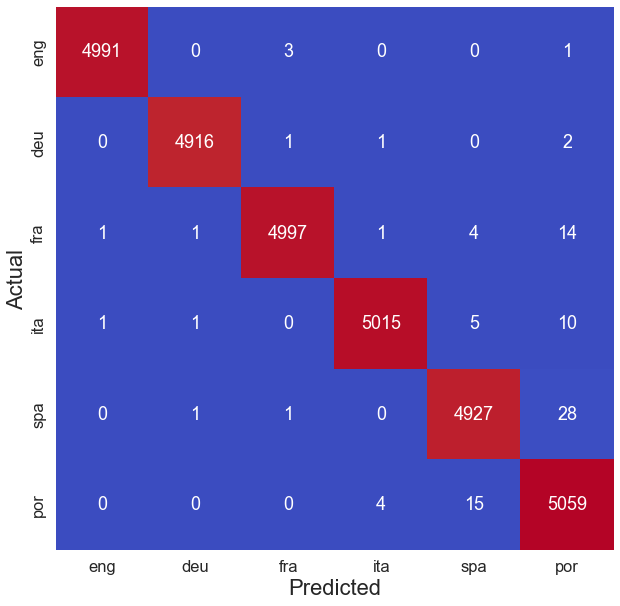

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix

x_test = test_features.drop('Language',axis=1)
y_test = test_features['Language']

#Get predictions on test set
labels = model.predict_classes(x_test)
predictions = encoder.inverse_transform(labels)

#Accuracy on test set
accuracy = accuracy_score(y_test,predictions)
print(accuracy)

#Create confusion matrix
conf_matrix = confusion_matrix(y_test,predictions)
conf_matrix_df = pd.DataFrame(conf_matrix,columns=lang_ls,index=lang_ls)

#Plot confusion matrix heatmap
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix_df,cmap='coolwarm',annot=True,fmt='.5g',cbar=False)
plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

We can see from the above matrix 4995 sentences, 4991 are detected as english (true positive), 3 as french, and 1 as portuguese (4 are false negative).

For German langauage, we have 4920 sentences, only 4916 are true positive. There are 4 are false negative.
We, can notice that the largest confusion is between spanish and portuges.

## 8. Inference

In [149]:
def get_inferred(sentence_ls):
    test_sentence = pro_process(sentence_ls)
    test_sen = vectorizer.fit_transform(test_sentence)
    test_feat = pd.DataFrame(data=test_sen.toarray(),columns=feature_names)
    test_feat = (test_feat - train_min)/(train_max-train_min)
    l = model.predict_classes(test_feat)
    predicted_label = encoder.inverse_transform(l)    
    return predicted_label

In [150]:
def main():
    print("Please enter your sentence: ")
    while True:
        im = input()
        if im.lower() == 'bye':
            print("bye!")
            break
        else:
            #print([im])
            df_test = pd.DataFrame()
            df_test['sentence'] = [im]
            print("The sentence language is: "+get_inferred(df_test.sentence)[0])
    

In [117]:
main()

Please enter your sentence: 
Ich liebe EIS


C:\Users\marwa\anaconda3\envs\nlp_env\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


['deu']
The sentence language is: deu
I like ice cream


C:\Users\marwa\anaconda3\envs\nlp_env\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


['spa']
The sentence language is: spa
I study engineering


C:\Users\marwa\anaconda3\envs\nlp_env\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


['eng']
The sentence language is: eng
I like ice-cream


C:\Users\marwa\anaconda3\envs\nlp_env\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


['eng']
The sentence language is: eng
Er is mein Sohn


C:\Users\marwa\anaconda3\envs\nlp_env\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


['deu']
The sentence language is: deu
Ich gehe draussen


C:\Users\marwa\anaconda3\envs\nlp_env\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


['deu']
The sentence language is: deu
I will go to Egypt in the summer


C:\Users\marwa\anaconda3\envs\nlp_env\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


['eng']
The sentence language is: eng
This book is very intersting


C:\Users\marwa\anaconda3\envs\nlp_env\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


['eng']
The sentence language is: eng
Mein sohn heisst Omar


C:\Users\marwa\anaconda3\envs\nlp_env\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


['deu']
The sentence language is: deu
thanks


C:\Users\marwa\anaconda3\envs\nlp_env\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


['eng']
The sentence language is: eng
danke


C:\Users\marwa\anaconda3\envs\nlp_env\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


['por']
The sentence language is: por
danke dir


C:\Users\marwa\anaconda3\envs\nlp_env\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


['eng']
The sentence language is: eng
thanks


C:\Users\marwa\anaconda3\envs\nlp_env\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


['eng']
The sentence language is: eng
bye
bye!


## 9. References


[1] Simões, Alberto, José João Almeida and Simon D. Byers. “Language Identification: a Neural Network Approach.” SLATE (2014).